In [1]:
import os
import numpy as np 
import pandas as pd 
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

test.json
train.json



In [2]:
sub_path = "../best_models/"
all_files = [name for name in os.listdir(sub_path)]

# Read and concatenate submissions
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "is_iceberg_" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head()

,id,is_iceberg_0,is_iceberg_1,is_iceberg_2,is_iceberg_3,is_iceberg_4
0,5941774d,1.374767e-02,1.093249e-02,8.015390e-03,1.357837e-02,3.675285e-02
1,4023181e,6.678092e-01,7.916377e-01,4.307120e-01,7.153560e-01,5.629413e-01
2,b20200e4,2.069721e-08,2.759628e-08,2.254251e-20,4.139442e-08,1.655777e-08
3,e7f018bb,9.999903e-01,9.999871e-01,9.999712e-01,9.999856e-01,9.999921e-01
4,4371c8c3,7.473412e-01,6.689892e-01,9.999754e-01,9.999623e-01,7.954028e-01


In [3]:
np.sum(concat_sub.corr() > 0.95)

is_iceberg_0    3
is_iceberg_1    4
is_iceberg_2    1
is_iceberg_3    2
is_iceberg_4    3
dtype: int64

In [4]:
threshold_high = 0.9
threshold_low = 0.1

In [5]:
result = []
scores = []
undefined = []

for _, row in concat_sub.iterrows():
    name = row.id
    row = row.copy().drop('id')
    high_score_count = np.sum(row > threshold_high)
    low_score_count = np.sum(row < threshold_low)
    mid_score_count = len(row) - high_score_count - low_score_count
    
    if high_score_count == len(row):
        dist = 1
    elif low_score_count == len(row):
        dist = 0
    else:
        dist = 0.5
        undefined.extend(row)
    
    scores.append(dist)
    
    if dist == 1.:
        score = 1.
    elif dist == 0:
        score = 0.
    else:
        score = np.median(row)
        
    result.append({
        'id': name,
        'is_iceberg': score,
    })

(array([ 2164.,     0.,     0.,     0.,     0.,  4453.,     0.,     0.,
            0.,  1807.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

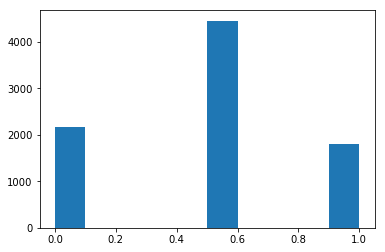

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.hist(scores, bins=10)

(array([ 1446.,   164.,   204.,   233.,   264.,   263.,   283.,   249.,
          262.,   469.,   628.,   305.,   798.,   280.,   228.,   259.,
          839.,   302.,   262.,   261.,   334.,   255.,   261.,   293.,
          652.,   757.,   346.,   292.,   290.,   324.,   375.,   321.,
          430.,   962.,   399.,   357.,   366.,   606.,   392.,   449.,
          424.,   342.,   339.,   372.,   371.,   342.,   292.,   252.,
          284.,  2787.]),
 array([  9.21088271e-24,   2.00000000e-02,   4.00000000e-02,
          6.00000000e-02,   8.00000000e-02,   1.00000000e-01,
          1.20000000e-01,   1.40000000e-01,   1.60000000e-01,
          1.80000000e-01,   2.00000000e-01,   2.20000000e-01,
          2.40000000e-01,   2.60000000e-01,   2.80000000e-01,
          3.00000000e-01,   3.20000000e-01,   3.40000000e-01,
          3.60000000e-01,   3.80000000e-01,   4.00000000e-01,
          4.20000000e-01,   4.40000000e-01,   4.60000000e-01,
          4.80000000e-01,   5.00000000e-01,   

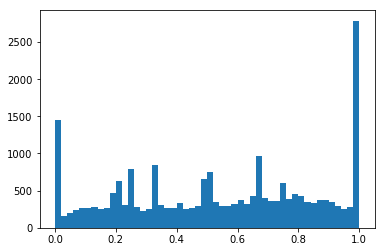

In [7]:
plt.hist(undefined, bins=50)

In [8]:
df = pd.DataFrame.from_dict(result)
df.to_csv('stack.csv', index=False, float_format='%.15f')
pd.read_csv('stack.csv').head()

,id,is_iceberg
0,5941774d,0.000000
1,4023181e,0.667809
2,b20200e4,0.000000
3,e7f018bb,1.000000
4,4371c8c3,0.795403
